In [1699]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")  #suppress warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Ecriture from Scratch d'un Perceptron
## Qu'est-ce que c'est ? <br>
![Perceptron](./images/perceptron.png)

Un Perceptron est un réseau de neurone composé d'un seul neurone. Plus précisément, on y retrouve une couche d'entrée et une couche de sortie composée d'un neurone comme montré ci-dessus.

## Comment ça marche ? <br>
Il faut voir un Perceptron comme une équation de la forme :
$$
\mathbf{y} = f(\mathbf{W} \cdot \mathbf{x} + \mathbf{b})
$$

Où :
- $\mathbf{x}$ est le vecteur d'entrée
- $\mathbf{W}$ est la matrice de poids (les coefficients à apprendre),
- $\mathbf{b}$ est le vecteur de biais, dans notre cas, il ne contient qu'une valeur,
- $f(\cdot)$ est une fonction d'activation (comme la sigmoïde, ReLU, etc.),
- $\mathbf{y}$ est le vecteur de sortie, donc la prédiction. 


### Fonction d'activation

Une fonction d'activation, est fonction qui à un comportement différent dépendamment de la valeur qu'elle prend en entrée. Prenons un exemple

#### Sigmoid
La fonction sigmoïde est définie par la formule suivante :

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

où :
- x est l'entrée,
- e est la base du logarithme naturel.

Cette fonction ramène des valeurs réelles en entrée, dans l'intervalle [0;1].
Ici, nous utiliserons cette propriété pour faire de la classification binaire. 
Par exemple si Sigmoid(X) > 0.5, alors le réseau de neurone doit retourner 1, sinon 0.

## Comment ça apprend ?
Pour apprendre un réseau de neurones mesure simplement l'écart entre ce qu'il prédit et ce qu'il aurait dû prédire. Enfin à l'aide d'un paramètre (Learning rate), il modifie ses poids pour améliorer ses prédictions. Dans un premier temps, nous ferons apprendre notre modèle par "passe avant". Signifiant qu'il apprendra pendant le passage de notre entrée X dans notre neurone. Dans un second temps, nous le ferons apprendre par "passe arrière". Ici, nous utiliserons les Gradients et la Binary Cross entropy comme fonction de cout afin de modifier nos poids.


# Cas pratique
Pour ce TP, nous allons utiliser le jeu de données décrivant des patients ayant (ou pas) des maladies du cœur. L'objectif sera de prédire pour un patient s'il a une maladie du cœur. 




In [1700]:
# add header names
headers = ['age', 'sex', 'chest_pain', 'resting_blood_pressure',
           'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results',
           'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak', "slope of the peak",
           'num_of_major_vessels', 'thal', 'heart_disease']

heart_df = pd.read_csv('datasets/heart.dat', sep=' ', names=headers)
print(len(heart_df))

270


In [1701]:
heart_df.head()

,age,sex,chest_pain,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope of the peak,num_of_major_vessels,thal,heart_disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [1702]:
# Compte le nombre de valeur nulle
heart_df.isna().sum()

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
serum_cholestoral          0
fasting_blood_sugar        0
resting_ecg_results        0
max_heart_rate_achieved    0
exercise_induced_angina    0
oldpeak                    0
slope of the peak          0
num_of_major_vessels       0
thal                       0
heart_disease              0
dtype: int64

In [1703]:
heart_df.dtypes

age                        float64
sex                        float64
chest_pain                 float64
resting_blood_pressure     float64
serum_cholestoral          float64
fasting_blood_sugar        float64
resting_ecg_results        float64
max_heart_rate_achieved    float64
exercise_induced_angina    float64
oldpeak                    float64
slope of the peak          float64
num_of_major_vessels       float64
thal                       float64
heart_disease                int64
dtype: object

In [1704]:
# TODO Suppression de la colonne cible de X
X =

# TODO Remplacer 1 par 0, et 2 par 1 dans la colonne heart_disease
heart_df['heart_disease'] =
heart_df['heart_disease'] =

# TODO Reshape de Y pour qu'il soit sous forme de ligne de une colonnes
Y =

# TODO Split de X et Y en train et test set avec train_test_split
Xtrain, Xtest, ytrain, ytest =

# TODO Normalisation des données en utilisant StandardScaler

print(f"Shape of Xtrain set is {Xtrain.shape}")
print(f"Shape of Xtest set is {Xtest.shape}")
print(f"Shape of Ytrain label is {ytrain.shape}")
print(f"Shape of Ytest labels is {ytest.shape}")

Shape of Xtrain set is (216, 13)
Shape of Xtest set is (54, 13)
Shape of Ytrain label is (216, 1)
Shape of Ytest labels is (54, 1)


# Aide pour la partie fit_without_backpropagation
La fonction fit est la fonction d'entrainement. Elle a pour objectif de s'exécuter un nombre donné de fois, et de mettre à jour les poids du modèle pour améliorer sa précision.
## La loss
La loss ou la fonction de coût correspond à l'écart entre la valeur réelle et la valeur prédite. C'est elle qui va indiquer comment modifier les poids pour améliorer le modèle. 

## Le learning rate

Le learning est une valeur définie par vous-même ! Ici, elle est par défaut à 0.01. Cette valeur a pour objectif d'indiquer au modèle la "prise de risque" qu'il peut prendre. La loss vous donne la direction dans laquelle aller pour améliorer votre modèle, et le learning rate correspond à la taille des pas que vous ferez dans cette direction. Mais attention avec de trop grand pas, vous pouvez vite sortir du chemin, avec de trop petits pas, vous pouvez ne jamais arriver.
Laissez cette valeur par défaut pour le moment, vous la ferez varier plus tard.

## Les epoch
Les epoch sont le nombre d'itérations d'apprentissages réalisé par le modèle. Imaginez que c'est le nombre d'heures que vous accordez à l'apprentissage d'un cours. Si vous n'en faites pas assez vous n'aurait pas de bons résultats, si vous en faite trop, vous vous serai tenter de faire du par cœur et de ne plus chercher à comprendre votre cours. 
Ici si votre nombre d'epoch est trop grand, votre modèle va apprendre par cœur. 
### Pourquoi c'est problématique ?
Quand vous entrainez votre modèle, vous l'entrainez sur un jeu de données d'entrainement. Si vos données d'entrainement et de test sont un peu différentes, votre modèle ne sera pas bons sur le jeu de test avec un trop grand nombre d'epoch.

### Alors il suffit d'avoir un jeu d'entrainement très similaire avec le jeu de test ?
Dans certains cas oui. Mais dans la plus parts des cas réels, quand on crée un modèle, il sera utiliser sur des données qui peuvent provenir de sources différentes. Dans le domaine médical par exemple, si vous avez un modèle entrainé à détecter des cancers dans un hospital, s'il n'a été entrainé que sur les images de l'hopital, alors il sera mauvais sur les images des autres hopitals.

### Comment définir le nombre d'epoch ?
Cela dépendra des cas d'utilisation. Mais généralement cela se fait en plusieurs étapes. Le but est de pousser notre modèle au maximum de ses capacités sans qu'il apprenne par cœur. Pour ce faire, il faut essayer avec une première valeur, dans notre cas, c'est 20 par défaut, et voir l'évolution de la courbe d'apprentissage. Nous verrons ça dans la deuxième partie de ce TP.


In [1705]:
class Perceptron():

    def __init__(self, X, y, input_size=13, learning_rate=0.01, epochs=20, loss_function=None):
        # TODO Initialiser self.X et self.Y
        self.X = 
        self.y = 
        # TODO Initialiser le learning rate
        self.learning_rate = 
        # TODO Initialiser epoch
        self.epochs = 
        # TODO Initialiser l'input_size 
        self.input_size = 
        # TODO Initialiser self.w (poids du modèle) de façon aléatoire avec np.uniform
        self.w = 
        # TODO Initialiser self.bias (biais du modèle) de façon aléatoire
        self.bias = 
        # TODO Initialiser à None une variable Z qui sera le résultat de la multiplication de la matrice X avec la matrice de poids W
        self.Z = 
        # TODO Initialiser à None une variable A qui sera le résultat du passage de la matrice Z dans la fonction d'activation
        self.A = 
        # TODO Initialiser self.loss pour pouvoir stocker les valeurs de loss lors de l'apprentissage
        self.loss =
        # TODO Initialiser la fonction de cout
        self.loss_function = 
        # TODO Initialiser self.scores pour pouvoir stocker les valeurs d'accuracy et de mse lors de l'apprentissage
        self.scores = 

    # Fonction qui initialise ou réinitialise les poids et le biais de façon aléatoire. Ainsi que réinitialiser les valeurs de la loss et des scores
    def init_weights(self):
        # TODO Réinitialiser les valeurs de self.w, self.bias. self.loss et self.scores
        self.w = 
        self.bias =
        self.loss = 
        self.scores = 

    # Fonction d'activation utilisée pour ramener notre sortie dans l'intervalle [0;1]
    def sigmoid(self, X):
        # TODO Ecrire la fonction Sigmoid, X est une valeur unique
        return 

    # Fonction d'activation utilisée pour avoir 0 ou 1 en sortie. À utiliser après la sigmoid.
    def activation_function(self, X):
        # TODO Ecrire la fonction d'activation treshold, X est une valeur unique
        if :
            return 
        else:
            return 

    # Retourne les prédictions pour le vecteur X. Attention le vectur X peut être une seule entrée (de 1 lignes de 13 colonnes), mais aussi plusieurs entrées (n lignes de 13 colonnes) !
    def predict(self, X):
        # Retourne la prédiction pour l'entrée ou les entrées X, pour vérifier si vous avez une entrée ou plusieurs, vous devez vous aider de la shape de X avec np.shape
        # TODO, Gestion pour 1 entrée 
        if np.shape()[] == :
            Z = 
            return [    ]
        # TODO, Gestion pour plusieurs entrées 
        if np.shape()[] !=  and np.shape()[] == :
            preds = 
            for xi in X:
                Z =
                preds.append(   )
            return preds
        # TODO, Cas ou la shape ne correspond à aucun des deux cas au dessus
        else:
            print("Bad shape !\n Expecting : ", self.input_size, " or : (", -1, ", ", self.input_size, ")")
  
    def binary_cross_entropy_loss(self, y, yhat):
        epsilon = 1e-15
        yhat = np.clip(yhat, epsilon, 1 - epsilon)
        loss = -np.mean(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))
        return loss

    # TODO, Ecrire la fonction retournant la MSE pour deux vecteur y et yhat en entrée
    def mse(self, y, yhat):
        

    # Version "facile" de l'entrainement. Ici, nous ne parlerons pas de backpropagation, ce sera pour un peu plus tard. Cette fonction apprend en même temps que l'entrée X passe dans le modèle. 
    def fit_without_backpropagation(self, X, y):
        # TODO, Initialiser deux array pour l'accuracy et la mse 
        accuracy = 
        mse = 
        # TODO, Itérer sur le nombre d'epoch choisi
        
            # TODO Initialiser une variable loss à 0
            loss = 
            # TODO Itérer sur X et y en utilisant la fonction zip
            for yi, xi in :
                # TODO Récupérer la prédiction pour la VALEUR Xi.
                
                # TODO Calculer l'erreur / l'écart entre la valeur prédite et la valeur attendue, en utilisant la fonction de cout donnée
                # Si pas fonction définie, l'erreur sera calculée comme suit : error = yi - yhat
                # Si None
                if :
                    # Si l'erreur est différente de 0, on incrémente la loss de 1, nous sommes sur une fonction de cout très simple.
                    error = 
                    if error != 0:
                        loss += 
                # Si binary_crossentropy
                elif :
                    error = 
                    loss +=
                # Si mse
                elif :
                    error = 
                    loss +=
                # Sinon message d'erreur
                else:
                    print("Bad loss function !")
                    return
                # TODO Mettre à jour les poids et le biais en utilisant l'erreur et le learning rate
                self.w +=
                self.bias += 

            # TODO Ajouter les valeurs de scores dans les arrays initialisés au début   
            accuracy.append(      )
            mse.append(      )           
            # TODO Mise à jour de la loss (en gardant les anciennes valeurs !)
            self.loss.append(      )
        # TODO Mettre à jour des scores du modèle (tout en gardant les ancinennes valeurs !)
        self.scores["accuracy"] = 
        self.scores["mse"] = 

    def plot_score(self, score):
        # TODO Afficher l'évolution de notre score pendant l'apprentissage
        

    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel('Epochs')
        plt.ylabel("Loss")
        if self.loss_function is None:
            plt.title("Loss evolution during training")
        else:
            plt.title(self.loss_function + " evolution during training")
        plt.show()

    # Laissez la partie ci-dessous de côté pour le moment vous vous attaquerez plus tard dans le TP.

    # Nous nous attaquons à la backpropagation ! Cette fonction réalise ce qu'on appelle la passe avant. Elle fait juste passer l'entrée X dans le modèle, et retourne en sortie la prédiction du modèlen ainsi que la loss associée à la prédiction
    def forward(self):
        # TODO Itérer sur les valeurs de X et Y avec la fonction zip
        for xi, yi in :
            # TODO Récupérer la prédiction de xi
            yhat = 
        # Si loss_function = binary_crossentropy  
        if self.loss_function == 'binary_crossentropy':
            # TODO Calcul de la loss
            loss = 
        # Si loss_function = mse
        elif self.loss_function == 'mse':
            # TODO Calcul de la loss
            loss = 
        # Si loss_function = None
        elif self.loss_function is None:
            print("No loss function defined ! ")
            loss = None
        # Si loss_function not defined
        else:
            print("No loss function defined ! ")
            loss = None
        return yhat, loss

    def backpropagation(self, yhat, yi, xi):
        # TODO Ecrire la backpropagation. Nous aurons besoin de calculer les Gradients pour nos poids, et notre biais. Vous aurez besoin de réaliser des dérivées partielles à la main avant et de les coder ensuite.
        # Pas de fonction de coût définie (None)
        if self.loss_function is None:
            print("No loss function defined !")
            return
        # Binary Cross Entropy (binary_crossentropy)
        if :
            # TODO Calcul de dL_wr_yhat
            dL_wr_yhat = 
            # TODO Calcul de dYhat_wr_z
            dYhat_wr_z =
            # TODO Calcul de dZ_wr_w
            dZ_wr_w = 
            # TODO Calcul de dZ_wr_b
            dZ_wr_b = 
            # TODO Calcul de dL_wr_w
            dL_wr_w = 
            # TODO Calcul de dL_wr_b
            dL_wr_b = 
            # TODO Mise à jour de la matrice poids
            self.w = 
            # TODO Mise à jour du biais
            self.bias = 

        # Mean Squared Error (mse)
        if :
            # TODO Calcul de dL_wr_yhat
            dL_wr_yhat = 
            # TODO Calcul de dYhat_wr_z
            dYhat_wr_z = 
            # TODO Calcul de dZ_wr_w
            dZ_wr_w = 
            # TODO Calcul de dZ_wr_b
            dZ_wr_b = 
            # TODO Calcul de dL_wr_w
            dL_wr_w = 
            # TODO Calcul de dL_wr_b
            dL_wr_b = 
            # TODO Mise à jour de la matrice de poids
            self.w = 
            # TODO Mise à jour du biais
            self.bias = 

    # La fonction fit est la fonction à appeler quand on veut entrainer le modèle. Contrairement à fit_without_backpropagation, dans cette fonction nous ferons de la backpropagation.
    def fit(self, X, y):
        # TODO Mise à jour des données d'entrainements
        self.X, self.y = 
        # TODO Initialisation / Réinitialisation de la matrice de poids et du biais
        
        # TODO Initialisation / Réinitialisation des tableaux de scores
        mse = 
        accuracy = 
        # TODO Itérer autant de fois que d'epoch
        for _ in :
            # TODO Itérer sur les valeurs de X et de Y avec la fonction zip
            for xi, yi in :
                # TODO Récupérer la prédiction yhat
                yhat = 
                # TODO Appeler la fonction de backpropagation
                
            # TODO Récupérer les prédictions pour tout le jeu d'entrainement X
            preds = 
            # TODO Calculer la MSE et l'ajouter au array de mse
            mse.append(   )
            # TODO Calculer l'accuracy et l'ajouter au array de l'accuracy
            accuracy.append(    )
            # TODO Sauvegarder la valeur de la loss à l'itération actuelle en utilisant la fonction de coût donnée.             
            # Loss_function is None
            if self.loss_function is None:
                print("No loss function defined !")
            # Loss_function = binary_crossentropy
            elif :
                self.loss.append(    )
            # Loss_function = mse
            elif :
                self.loss.append(     )
            # Not Defined
            else:
                print("No loss function defined !")
        # TODO Sauvegarder les valeurs de scores de notre modèle
        self.scores["accuracy"] =
        self.scores["mse"] = 



In [1706]:
# TODO Appeler le modèle
perceptron = 
# TODO Lancer l'entrainement (sans backpropagation) avec le jeu d'entrainement
perceptron.fit_without_backpropagation(Xtrain, ytrain)

# Accuracy
L'accuracy correspond à la précision de votre modèle dans la prédiction

In [1707]:
# TODO Récupérer les prédictions pour le jeu de test
yhat = 
# TODO Calculer l'accuracy des valeurs prédites pour le jeu de test et afficher la
accuracy = 
print("accuracy sur le jeu de test : ", accuracy * 100, " %")


accuracy sur le jeu de test :  72.22222222222221  %


# Affichage de la courbe d'apprentissage

Votre Perceptron apprend avec la méthode fit. Dans cette méthode, nous avons sauvegardé les valeurs de la loss à chaque itération d'apprentissage. 

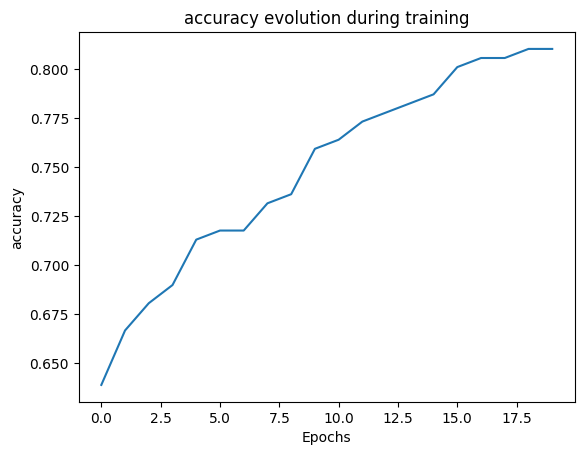

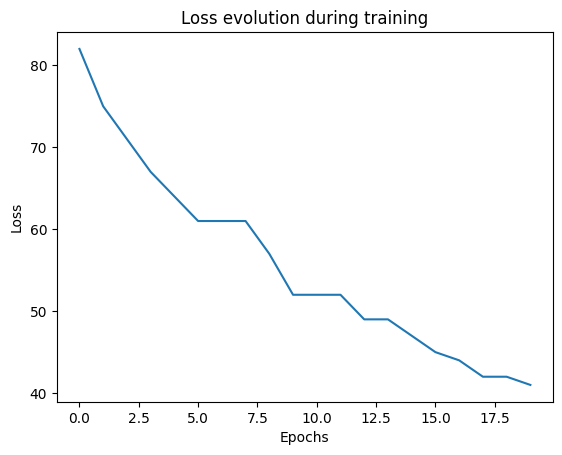

In [1708]:
# TODO Afficher la loss pendant l'apprentissage


# TODO Afficher l'accuracy pendant l'apprentissage


# L'impact du Learning Rate

Voyons l'impact du Learning rate dans l'apprentissage du Perceptron. 
Vous avez dû déclarer votre Perceptron avec perceptron = Perceptron() <br>
Essayez ci-dessous cette ligne : perceptron = Perceptron(Xtrain, ytrain, learning_rate=0.001)

In [1709]:
# TODO Appeler le modèle avec learning rate à 0.001
perceptron = 
# TODO Lancer un nouvel entrainement


# Afficher les courbes d'apprentissages et l'accuracy

In [1710]:
# TODO Récupérer les prédictions pour le jeu de test
yhat = 
# TODO Calculer l'accuracy des valeurs prédites pour le jeu de test et afficher la
accuracy = 
print("accuracy sur le jeu de test : ", accuracy * 100, " %")

accuracy sur le jeu de test :  79.62962962962963  %


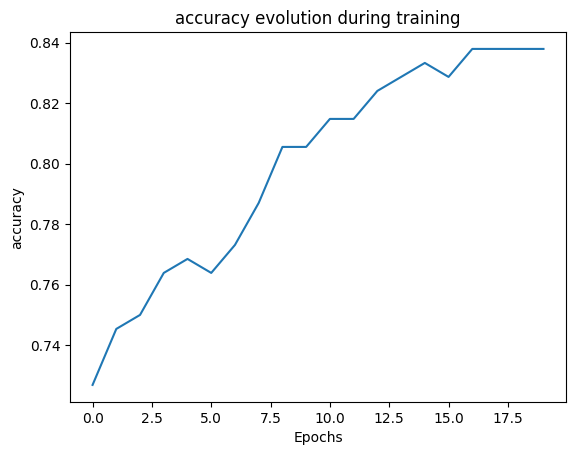

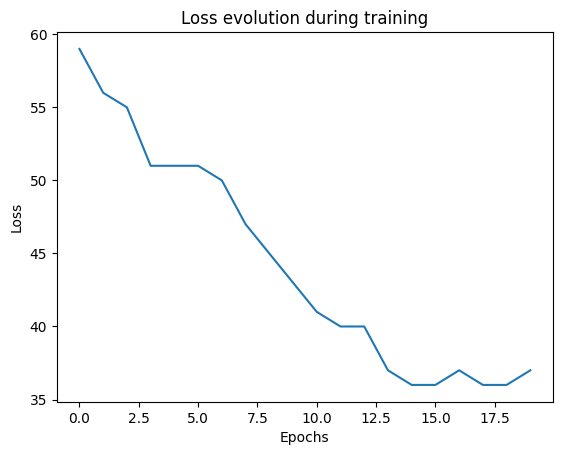

In [1711]:
# TODO Afficher la loss pendant l'apprentissage


# TODO Afficher l'accuracy pendant l'apprentissage


Vous devrez voir des courbes totalement différentes. C'est l'impact du learning rate. Dans la première partie le learning rate était trop haut donc le modèle oscillait entre amélioration et dégradation des résultats, car il "sortait du chemin". C'est ce qu'on observe avec la courbe d'évolution de l'accuracy. Maintenant, on observe qu'elle ne fait que de s'améliorer. 


## Important
Il est possible que vous ayez des résultats proches ou meilleurs dans la première partie par rapport à la deuxième. Cela peut s'expliquer par l'aléatoire lors de l'initialisation des poids du modèle. De plus les résultats peuvent être meilleurs en apprentissage mais bien moins bons en test et/ou en utilisation réelle. N'hésitez pas à relancer plusieurs fois le modèle pour avoir une bonne idée des résultats.

# L'impact du nombre d'epoch
Comme précisé plus haut, un nombre trop grand d'epoch, amène à de l'apprentissage par cœur (sur-apprentissage). C'est ce que nous allons montrer ici.

In [1712]:
# TODO Appeler le modèle avec learning rate à 0.001, et le nombre d'epoch à 100
perceptron = 
# TODO Lancer un nouvel entrainement

# Afficher les courbes d'apprentissages et l'accuracy

In [1713]:
# TODO Récupérer les prédictions pour le jeu de test
yhat = 
# TODO Calculer l'accuracy des valeurs prédites pour le jeu de test et afficher la
accuracy = 
print("accuracy sur le jeu de test : ", accuracy * 100, " %")

accuracy sur le jeu de test :  70.37037037037037  %


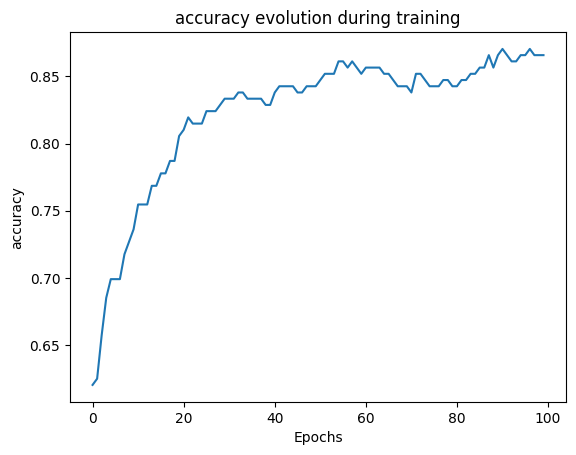

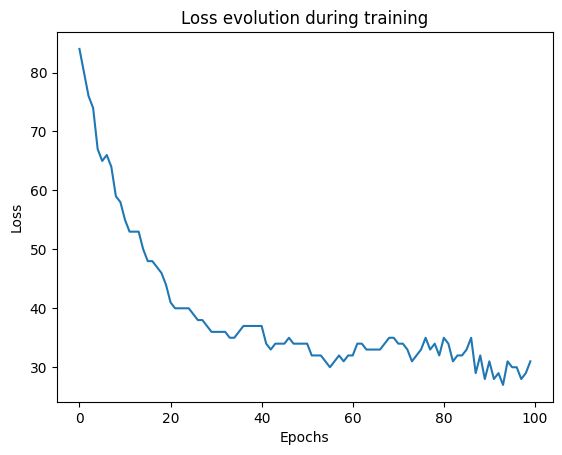

In [1714]:
# TODO Afficher la loss pendant l'apprentissage

# TODO Afficher l'accuracy pendant l'apprentissage

Ici l'apprentissage se fait en 100 itérations et non plus 20. Tout d'abord on observe beaucoup d'oscillations sur la fin de la courbe, ce qui est un "symptome" signifiant que le modèle n'apprend pas bien. De plus on observe que le modèle ne s'améliore presque plus à la fin. Enfin, malgré une accuracy de presque 90% sur le jeu de données d'entrainements, l'accuracy sur le jeu de données de test, a elle diminué !

# Back Propagation !
Jusqu'à présent, nous avons mis à jour nos poids avec seulement une fonction de cout. Cependant, il est possible d'aller plus loin, en utilisant la descente de gradient ! 
## La descente de gradient
La descente de gradient est une méthode d'optimisation utilisée pour minimiser une fonction de coût, souvent dans le cadre de l'apprentissage automatique ou de l'entraînement de modèles. L'idée principale de cette technique est de trouver les paramètres du modèle (par exemple, les poids d'un réseau de neurones) qui minimisent l'erreur ou la fonction de coût.

L'algorithme de descente de gradient fonctionne en ajustant les paramètres du modèle dans la direction opposée au gradient de la fonction de coût. En d'autres termes, on "descend" la pente de la fonction de coût pour atteindre un minimum local ou global.

Formellement, le gradient d'une fonction 𝑓(𝜃) par rapport aux paramètres 𝜃 est un vecteur qui indique la direction dans laquelle 𝑓(𝜃) augmente le plus rapidement. En prenant la direction opposée au gradient, on déplace les paramètres dans la direction qui diminue la fonction de coût.

Le gradient se calcul à l'aide de dérivées partielles. 

### Les dérivées partielles
La dérivée partielle est une dérivée de fonction multivariée par rapport à une seule de ses variables, en maintenant les autres variables constantes.
Soit une fonction $ f(x_1, x_2, \dots, x_n) $ définie sur un domaine dans $ \mathbb{R}^n $, la dérivée partielle de $ f $ par rapport à la variable $ x_i $ est notée $ \frac{\partial f}{\partial x_i} $ et se définit comme suit :

$$
\frac{\partial f}{\partial x_i}(x_1, x_2, \dots, x_n) = \lim_{\Delta x_i \to 0} \frac{f(x_1, \dots, x_i + \Delta x_i, \dots, x_n) - f(x_1, \dots, x_n)}{\Delta x_i}
$$

#### Interprétation géométrique
La dérivée partielle $ \frac{\partial f}{\partial x_i} $ représente la pente de la tangente à la surface $ f(x_1, x_2, \dots, x_n) $ dans la direction de la variable $ x_i $, en maintenant les autres variables constantes.

#### Exemple
Soit la fonction $ f(x, y) = x^2 y + y^3 $. La dérivée partielle de $ f $ par rapport à $ x $ est :

$$
\frac{\partial f}{\partial x} = 2xy
$$

et la dérivée partielle de $ f $ par rapport à $ y $ est :

$$
\frac{\partial f}{\partial y} = x^2 + 3y^2
$$

## En pratique
Maintenant que nous avons vu les dérivées partielles, nous n'avons plus qu'à calculer le gradient de notre fonction de coût par rapport à notre matrice de poids W et notre biais ne l'oublions pas !
Pour ce faire, vous aurez besoin d'une dernière information : La Chain Rule

## Chain Rule
La **règle de chaîne** pour les fonctions à plusieurs variables permet de calculer les dérivées lorsque les variables d'une fonction dépendent elles-mêmes d'autres variables. Ce cas est fréquent lorsqu'une fonction multivariée est composée de plusieurs sous-fonctions qui dépendent de plusieurs variables.

## Formulation générale

Soit une fonction $ z = f(x_1, x_2, \dots, x_n) $ dépendant de $ n $ variables $ x_1, x_2, \dots, x_n $, et chaque variable $ x_i $ dépend d'une autre variable $ t $, c'est-à-dire $ x_i = g_i(t) $ pour $ i = 1, 2, \dots, n $.

La dérivée de $ z $ par rapport à $ t $ peut être calculée à l'aide de la règle de chaîne, qui s'écrit sous la forme suivante :

$$
\frac{dz}{dt} = \sum_{i=1}^{n} \frac{\partial f}{\partial x_i} \cdot \frac{dx_i}{dt}
$$

Autrement dit, la dérivée de $ z $ par rapport à $ t $ est la somme des produits de la dérivée partielle de $ f $ par rapport à chaque $ x_i $ et de la dérivée de $ x_i $ par rapport à $ t $.

## Interprétation

La règle de chaîne pour plusieurs variables nous dit que la variation de $ z $ par rapport à $ t $ est due à la variation de chaque $ x_i $ par rapport à $ t $, avec un "poids" donné par la dérivée partielle de $ f $ par rapport à $ x_i $. Cette approche permet de gérer des fonctions dans lesquelles plusieurs variables dépendent d'une même variable $ t $.

## Exemple

Soit une fonction $ z = f(x, y) = x^2 y + y^3 $, où $ x $ et $ y $ dépendent de $ t $, c'est-à-dire $ x = g_1(t) $ et $ y = g_2(t) $. Nous voulons trouver la dérivée de $ z $ par rapport à $ t $.

La règle de chaîne nous donne :

$$
\frac{dz}{dt} = \frac{\partial f}{\partial x} \cdot \frac{dx}{dt} + \frac{\partial f}{\partial y} \cdot \frac{dy}{dt}
$$

1. **Calcul des dérivées partielles** :
   - $ \frac{\partial f}{\partial x} = 2xy $
   - $ \frac{\partial f}{\partial y} = x^2 + 3y^2 $

2. **Substitution dans la règle de chaîne** :
   
   $$
   \frac{dz}{dt} = 2xy \cdot \frac{dx}{dt} + (x^2 + 3y^2) \cdot \frac{dy}{dt}
   $$

Ainsi, la dérivée de $ z $ par rapport à $ t $ est donnée par la somme des termes $ 2xy \cdot \frac{dx}{dt} $ et $ (x^2 + 3y^2) \cdot \frac{dy}{dt} $.

# Prenons un exemple concret

## Architecture du perceptron

Notre perceptron a une couche d'entrée de 13 nœuds prenant en entrée les 13 valeurs du vecteur $ X $. Et nous avons une fonction d'activation Sigmoid défini comme suit : 

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Notre prédiction $ \hat{Y} $ pour l'entrée $ X $, s'obtient de la façon suivante : 
(On oublie la fonction treshold pour le moment)
$$
\hat{Y} = sigmoid(X . W + b)
$$

La Loss associée à cette prédiction s'obtient avec la Binary Cross Entropy. 
Dont la formule est la suivante :

$$
\mathcal{L}(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

Où :
- $ y $ est l'étiquette vraie (valeur binaire : 0 ou 1),
- $ \hat{y} $ est la probabilité prédite par le modèle que l'exemple appartienne à la classe 1 (c'est-à-dire $ \hat{y} $ est une valeur dans l'intervalle $ [0, 1] $).

Voici donc les calculs à réaliser pour obtenir le gradient de la matrice de poids et le gradient du biais.


- Dérivée partielle de la fonction de coût par rapport à la prediction $ \hat{Y} $ : $ \frac{\partial L}{\partial \hat{Y}} $
- Dérivée partielle de $ \hat{Y} $ par rapport à $ Z $ : $ \frac{\partial \hat{Y}}{\partial Z} $, on défini $ Z $ comme suit : $ Z = X . W + b $ et on rappel que $ \hat{Y} = sigmoid(Z) = \frac{1}{1 + e^{Z}}$.
- Dérivée partielle de $ Z $ par rapport à $ W $ : $ \frac{\partial Z}{\partial W} $
- Dérivée partielle de $ Z $ par rapport à $ b $ : $ \frac{\partial Z}{\partial b} $

Ce que l'on cherche à avoir à la fin, c'est : 
- Dérivée partielle de $ L $ par rapport à $ W $ : $ \frac{\partial L}{\partial W} $
- Dérivée partielle de $ L $ par rapport à $ b $ : $ \frac{\partial L}{\partial b} $

Et pour les obtenir on utilise la Chain Rule : 

$$
\frac{\partial L}{\partial W} = \frac{\partial L}{\partial \hat{Y}} . \frac{\partial \hat{Y}}{\partial Z} . \frac{\partial Z}{\partial W}
$$

$$
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial \hat{Y}} . \frac{\partial \hat{Y}}{\partial Z} . \frac{\partial Z}{\partial b}
$$

Voilà vous avez toute la théorie ! Plus qu'à faire !
Quand vous aurez fini vos calculs, vous pourrez vous attaquer à la dernière partie de la classe Perceptron. Et ensuite reprendre ci-dessous !

In [1721]:
# TODO Appeler le modèle en précisant la loss_function à mse
perceptron =

# TODO Lancer l'entrainement avec les jeux d'entrainements
perceptron.fit(Xtrain, ytrain)



In [1722]:
# TODO Récupérer les prédictions pour le jeu de test
yhat =
# TODO Calculer l'accuracy des valeurs prédites pour le jeu de test et afficher la
accuracy = 
print("accuracy sur le jeu de test : ", accuracy * 100, " %")

accuracy sur le jeu de test :  64.81481481481481  %


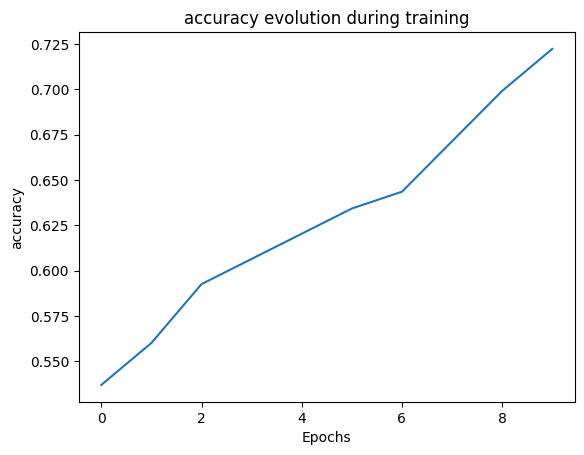

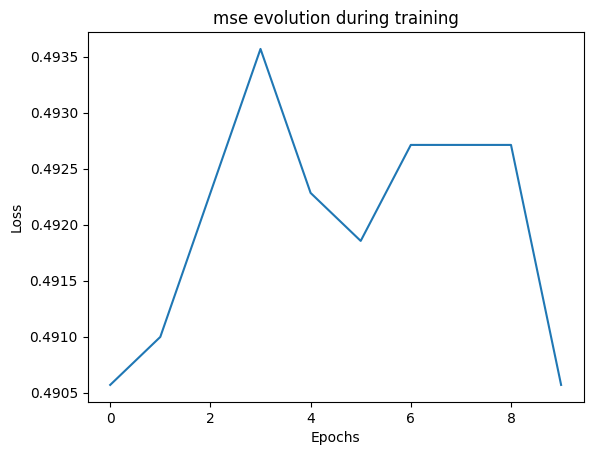

In [1723]:
# TODO Afficher la loss pendant l'apprentissage

# TODO Afficher l'accuracy pendant l'apprentissage


## Réessayez en utilisant la Binary Cross Entropy !